## Importing Data

In [831]:
#pip install ucimlrepo

In [832]:
# # Importing data set

from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# # fetch dataset 
# adult = fetch_ucirepo(id=2) 
  
# # data (as pandas dataframes) 
# X = adult.data.features 
# y = adult.data.targets 

# #combining 2 data frames
# data = pd.concat([X, y], axis=1)

data =  pd.read_csv('adult.csv')

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Cleaning Dataset


In [833]:
data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [834]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Label encoding


In [835]:
data['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [836]:
# Replacing <=50k. to <=50k and >50k. to >50k

# methanata report eke kallak enna thiyenawa eka yasinige notepad ekaen balahanna



data["income"] = data["income"].str.replace('<=50K.', '<=50K')
data["income"] = data["income"].str.replace('>50K.', '>50K')

data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

### Standerd Scaling

In [837]:
data['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [838]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [839]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [840]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [841]:
# Check NA values
data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [842]:
# Droping Null Values

data = data.dropna()
data.isna().sum()



age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [843]:
data.isin(['?']).sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [844]:
data.drop("education", axis=1, inplace=True)
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [845]:
data = data.replace('?', np.nan).dropna()
data.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [846]:
data.duplicated().sum()

47

In [847]:
data.drop_duplicates(inplace=True)

In [848]:
data.shape

(45175, 14)

In [849]:
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [850]:
# Get a list of columns with categorical data
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns and replace original columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,13,4,9,3,4,1,0,0,40,38,0
48837,39,2,215419,13,0,9,1,4,0,0,0,36,38,0
48839,38,2,374983,13,2,9,0,4,1,0,0,50,38,0
48840,44,2,83891,13,0,0,3,1,1,5455,0,40,38,0


In [851]:
# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize data in the DataFrame 'data'

target = data['income']
data = data.drop(columns=['income'])

data[data.columns] = scaler.fit_transform(data)


data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.033585,2.91625,-1.062200,1.128923,0.943267,-1.482668,-0.258452,0.384230,0.693823,0.142663,-0.218899,-0.078493,0.262722
1,0.865959,1.87300,-1.007350,1.128923,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.146811,-0.218899,-2.327069,0.262722
2,-0.042086,-0.21350,0.245214,-0.438652,-1.722363,-0.240991,-0.258452,0.384230,0.693823,-0.146811,-0.218899,-0.078493,0.262722
3,1.092971,-0.21350,0.425761,-1.222440,-0.389548,-0.240991,-0.884386,-2.018206,0.693823,-0.146811,-0.218899,-0.078493,0.262722
4,-0.798790,-0.21350,1.407179,1.128923,-0.389548,0.752350,2.245285,-2.018206,-1.441290,-0.146811,-0.218899,-0.078493,-5.330650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.420438,-0.21350,0.525050,1.128923,0.943267,0.752350,0.993417,0.384230,0.693823,-0.146811,-0.218899,-0.078493,0.262722
48837,0.033585,-0.21350,0.243066,1.128923,-1.722363,0.752350,-0.258452,0.384230,-1.441290,-0.146811,-0.218899,-0.411615,0.262722
48839,-0.042086,-0.21350,1.753355,1.128923,-0.389548,0.752350,-0.884386,0.384230,0.693823,-0.146811,-0.218899,0.754313,0.262722
48840,0.411937,-0.21350,-1.001860,1.128923,-1.722363,-1.482668,0.993417,-3.219425,0.693823,0.579538,-0.218899,-0.078493,0.262722


In [852]:
# Calculate the standard deviation of all columns
std_X = data.std()
print('Standard Deviation after Performing Standard Scaler: \n',std_X)

Standard Deviation after Performing Standard Scaler: 
 age               1.000011
workclass         1.000011
fnlwgt            1.000011
education-num     1.000011
marital-status    1.000011
occupation        1.000011
relationship      1.000011
race              1.000011
sex               1.000011
capital-gain      1.000011
capital-loss      1.000011
hours-per-week    1.000011
native-country    1.000011
dtype: float64


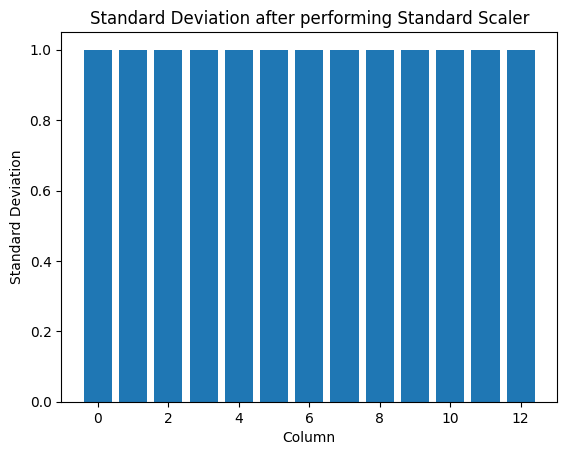

In [853]:
# Plot the Standard Deviation of all columns
plt.bar(range(len(std_X)), std_X)
plt.title("Standard Deviation after performing Standard Scaler")
plt.xlabel("Column")
plt.ylabel("Standard Deviation")
plt.show()

In [854]:
# Calculate the mean of all columns
mean_X = data.mean()
print('Mean after Performing Standard Scaler: \n',mean_X)

Mean after Performing Standard Scaler: 
 age               1.509952e-17
workclass         1.170213e-16
fnlwgt           -1.410862e-16
education-num    -2.878347e-17
marital-status    1.038092e-17
occupation        5.662322e-17
relationship      6.291469e-19
race             -9.122629e-17
sex              -8.996800e-17
capital-gain     -5.347748e-18
capital-loss      1.132464e-17
hours-per-week   -9.201273e-17
native-country    9.122629e-17
dtype: float64


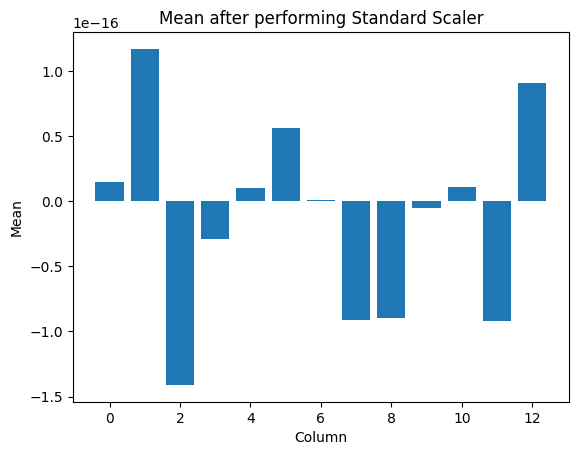

In [855]:
# Plot the Mean of all columns
plt.bar(range(len(mean_X)), mean_X)
plt.title("Mean after performing Standard Scaler")
plt.xlabel("Column")
plt.ylabel("Mean")
plt.show()

## Principal Component Analysis(PCA)

In [856]:
# Instantiate PCA
pca = PCA()

In [857]:
# Fit and transform the data
X_pca = pca.fit_transform(data)

In [858]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display attribute names and their contributions to explained variance
df_components = pd.DataFrame({'Attribute': data.columns, 'Explained Variance Ratio': explained_variance})

print("Explained Variance Ratio for Each Attribute:\n")
print(df_components)

Explained Variance Ratio for Each Attribute:

         Attribute  Explained Variance Ratio
0              age                  0.159185
1        workclass                  0.093803
2           fnlwgt                  0.086877
3    education-num                  0.084747
4   marital-status                  0.079273
5       occupation                  0.077040
6     relationship                  0.073873
7             race                  0.071338
8              sex                  0.067483
9     capital-gain                  0.065108
10    capital-loss                  0.058667
11  hours-per-week                  0.052972
12  native-country                  0.029634


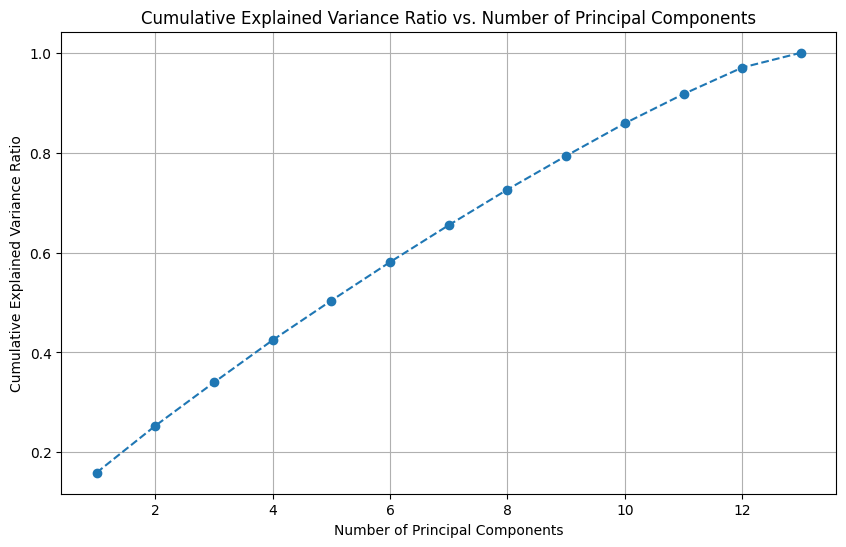

In [859]:
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [860]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(data)
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6,7,8,9
0,0.776945,0.976646,0.000276,-0.697833,-1.128018,-1.686040,1.873544,-1.918672,-0.384870,-0.319098
1,0.833077,0.872461,0.747157,-0.908780,-0.590620,-1.670044,0.687414,-0.130746,0.529908,-1.014595
2,0.886616,-0.330346,0.643282,-0.683154,-0.108027,0.609371,-0.181776,0.705427,-0.300574,0.129765
3,0.601948,-1.452807,1.223392,0.495497,0.011877,0.094685,-0.625768,0.015312,-0.330190,-1.923799
4,-2.563063,-1.669230,0.953954,4.721530,0.674020,-0.418288,0.628209,0.497818,-0.658595,2.861867
...,...,...,...,...,...,...,...,...,...,...
45170,-0.453889,0.308240,-1.619942,0.191521,-0.022657,0.036310,0.025734,0.278327,-0.231643,0.132711
45171,0.118661,1.361043,0.268043,0.324556,0.296442,0.381674,-0.336316,1.531399,-0.659913,0.517892
45172,1.374698,-0.404424,-1.337090,0.413722,0.053638,0.857052,0.355139,1.130724,-0.891238,0.044010
45173,0.108837,0.744853,1.951205,1.789920,0.060730,0.871003,-0.721346,-1.589698,-1.180538,-1.643089


In [861]:
# Concatenate the target variable
X_pca['income'] = target
X_pca

,0,1,2,3,4,5,6,7,8,9,income
0,0.776945,0.976646,0.000276,-0.697833,-1.128018,-1.686040,1.873544,-1.918672,-0.384870,-0.319098,0.0
1,0.833077,0.872461,0.747157,-0.908780,-0.590620,-1.670044,0.687414,-0.130746,0.529908,-1.014595,0.0
2,0.886616,-0.330346,0.643282,-0.683154,-0.108027,0.609371,-0.181776,0.705427,-0.300574,0.129765,0.0
3,0.601948,-1.452807,1.223392,0.495497,0.011877,0.094685,-0.625768,0.015312,-0.330190,-1.923799,0.0
4,-2.563063,-1.669230,0.953954,4.721530,0.674020,-0.418288,0.628209,0.497818,-0.658595,2.861867,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45170,-0.453889,0.308240,-1.619942,0.191521,-0.022657,0.036310,0.025734,0.278327,-0.231643,0.132711,0.0
45171,0.118661,1.361043,0.268043,0.324556,0.296442,0.381674,-0.336316,1.531399,-0.659913,0.517892,0.0
45172,1.374698,-0.404424,-1.337090,0.413722,0.053638,0.857052,0.355139,1.130724,-0.891238,0.044010,NaN
45173,0.108837,0.744853,1.951205,1.789920,0.060730,0.871003,-0.721346,-1.589698,-1.180538,-1.643089,0.0


In [862]:
X_pca = X_pca.dropna()
X_pca

,0,1,2,3,4,5,6,7,8,9,income
0,0.776945,0.976646,0.000276,-0.697833,-1.128018,-1.686040,1.873544,-1.918672,-0.384870,-0.319098,0.0
1,0.833077,0.872461,0.747157,-0.908780,-0.590620,-1.670044,0.687414,-0.130746,0.529908,-1.014595,0.0
2,0.886616,-0.330346,0.643282,-0.683154,-0.108027,0.609371,-0.181776,0.705427,-0.300574,0.129765,0.0
3,0.601948,-1.452807,1.223392,0.495497,0.011877,0.094685,-0.625768,0.015312,-0.330190,-1.923799,0.0
4,-2.563063,-1.669230,0.953954,4.721530,0.674020,-0.418288,0.628209,0.497818,-0.658595,2.861867,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45169,1.301481,0.159722,-0.120961,0.383640,0.433919,1.760658,-0.274447,1.727085,-0.589243,0.026129,1.0
45170,-0.453889,0.308240,-1.619942,0.191521,-0.022657,0.036310,0.025734,0.278327,-0.231643,0.132711,0.0
45171,0.118661,1.361043,0.268043,0.324556,0.296442,0.381674,-0.336316,1.531399,-0.659913,0.517892,0.0
45173,0.108837,0.744853,1.951205,1.789920,0.060730,0.871003,-0.721346,-1.589698,-1.180538,-1.643089,0.0


In [863]:
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41802 entries, 0 to 45174
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       41802 non-null  float64
 1   1       41802 non-null  float64
 2   2       41802 non-null  float64
 3   3       41802 non-null  float64
 4   4       41802 non-null  float64
 5   5       41802 non-null  float64
 6   6       41802 non-null  float64
 7   7       41802 non-null  float64
 8   8       41802 non-null  float64
 9   9       41802 non-null  float64
 10  income  41802 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB


In [864]:
# Exporting Pre processed dataset
X_pca.to_csv('cleaned_data.csv', index=False)

# Data Visulization

In [865]:
c_data =  pd.read_csv('cleaned_data.csv')

In [866]:
import seaborn as sns
import matplotlib.pyplot as plt

In [867]:

# Create a bar plot for 'age' and 'income' columns using seaborn
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(x='income', y='age', hue='sex', data=c_data)  # Create the bar plot with seaborn

# Set labels and title
plt.xlabel('Income')  # Set x-axis label
plt.ylabel('Age')  # Set y-axis label
plt.title('Bar Plot of Income vs Age')  # Set title

plt.show()  # Display the bar plot


ValueError: Could not interpret value `age` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# sns.pairplot(c_data, hue ='income')
# plt.show()

In [ ]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = c_data.groupby(['education', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education', columns = 'income', values = 'count').fillna(0)

sns.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class')

KeyError: 'education'

<Figure size 1000x1000 with 0 Axes>

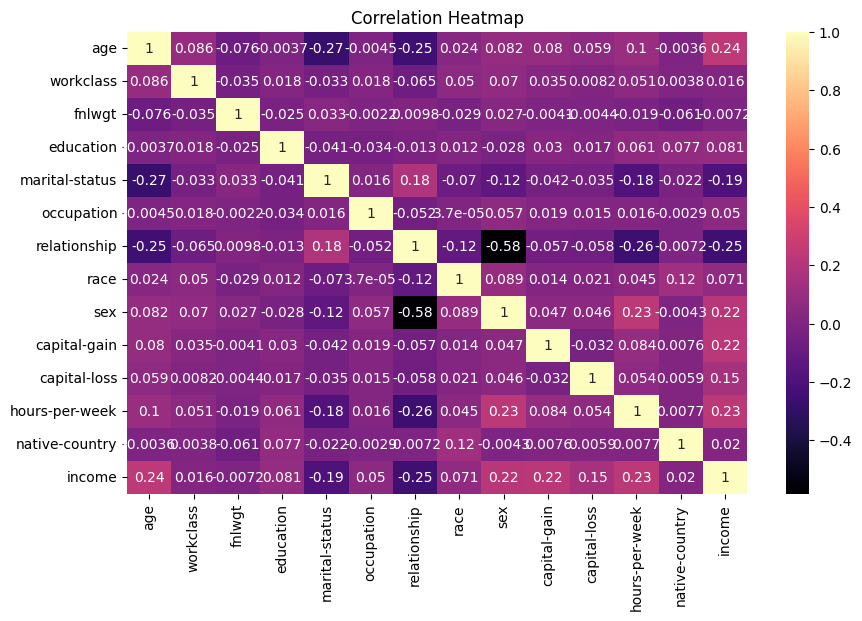

In [ ]:
numeric_cols = c_data.select_dtypes(include=['number']).columns
numeric_data = c_data[numeric_cols]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()